# Problem set 1: Solving the consumer problem

**Note**: A lot of the problems in this cource are HARD. Try getting used to using Google when you have something you don't understand or a function you don't know how to use! There are a lot of good answers on the internet!  
To get an understand of how everything works, try using different variable values in the optimization problems!

# Tasks

## functions

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

In [165]:
def u(x1, x2, alpha=0.5,beta=1):
    return (alpha * x1 ** (-beta) + (1 - alpha) * x2 ** (-beta)) ** (-1 / beta)

## print

In [166]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.  
Read about f-strings: https://zetcode.com/python/fstring/  
Play around with the f strings, to see how the formating changes!

In [168]:
# f'{value:{width}.{precision}}' 
# f'{1.5555:6.3} outputs:  1.56
# with a width of 6 including spaces
# precision is the number of digits after the "." INCLUDING the "." itself

def print_table(x1_vec,x2_vec):
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
        
    for i, x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, x2 in enumerate(x2_vec):
            text += f'{u(x1, x2):6.3f}' #
        
    # d. print
    print(text) 
    
print_table(x1_vec, x2_vec) # remember to call the function after defining it

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


## matplotlib

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [169]:
# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

Read about meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html  
Or here: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy  
Essentially, meshgrid is a way of taking two vectors and making a grid combining every element of each vector, so we can draw the utility function for each combination of $(x1, x2)$

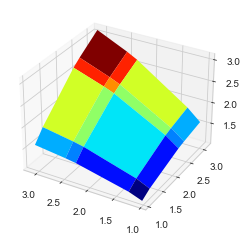

In [170]:
# evaluate utility function
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
u_grid = u(x1_grid,x2_grid)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=cm.jet) # cmap is "color map"

ax.invert_xaxis() # try removing this, it's just to make figure look a bit nicer*

Let's say you have the two vectors:  
x1\_vec = [1.05,1.3,2.3,2.5,3.1]  
x2\_vec = [1.05,1.3,2.3,2.5,3.1]  
Then combining every element gives:  
(1.05, 1.05), (1.05, 1.3), (1.05, 2.3) ... (3.1, 2.5), (3.1, 3.1)  
The `meshgrid` for `x1_grid` and `x2_grid` is made in such a way that if you put the two grids "on top of eachother", you get every combination.

In [171]:
print(x1_grid)
print("\n") # space to make it easier to read
print(x2_grid)

[[1.05 1.05 1.05 1.05 1.05]
 [1.3  1.3  1.3  1.3  1.3 ]
 [2.3  2.3  2.3  2.3  2.3 ]
 [2.5  2.5  2.5  2.5  2.5 ]
 [3.1  3.1  3.1  3.1  3.1 ]]


[[1.05 1.3  2.3  2.5  3.1 ]
 [1.05 1.3  2.3  2.5  3.1 ]
 [1.05 1.3  2.3  2.5  3.1 ]
 [1.05 1.3  2.3  2.5  3.1 ]
 [1.05 1.3  2.3  2.5  3.1 ]]


## optimize

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Read about `optimize.minimize`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

-1.4275625000000014
-0.8878628265110765


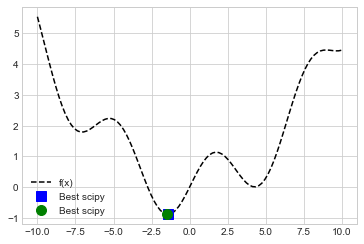

In [172]:
import numpy as np
from scipy import optimize

# a. define function
def f(x):
    return np.sin(x) + 0.05 * x ** 2

# b. solution using a loop
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number

# solving for the minimal x with a loop, going over every possible value
# NOTE: we can only find the minimum within the given interval of x_vec, if it is not in the interval, we won't find it.
for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    x_vec[i] = x
    if f_now < f_best:
        f_best = f_now
        x_best = x

# c. solution using scipy optmize
x_guess = [0]      
obj = lambda x: f(x)
res = optimize.minimize(obj, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0]
f_best_scipy = res.fun

# d. print
print(x_best_scipy)
print(f_best_scipy)

# e. figure, a lot of extra stuff to make it pretty!
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, f_vec, ls='--', color='black', label = "f(x)")
ax.plot(x_best_scipy, f_best_scipy, ls='', color='blue', marker='s', markersize=10, label = "Best scipy")
ax.plot(x_best, f_best, color='green', ls='', marker='o', markersize=10,label = "Best scipy")
ax.legend()

# Problem

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

A little note on the `zip` function:


In [173]:
x_test = np.array([1,2,3,4,5])
alpha_test = np.array([0.2,0.2,0.2,0.2,0.2])

print(list(zip(x_test,alpha_test)))

[(1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2), (5, 0.2)]


It bassically combines every element from two lists into these parenthesis. "Zipping them" together.

In [174]:
def utility_function(x,alpha):
    # using "u *= x" is the same as saying "u = u * x"
    # np.max is used so negative x are ignored (we DONT want negative utility).
    # E.g: np.max(-5, 0) just returns 0 
    
    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now
    return u

# total expenditures must be p1 * x1 + p2 * x2 + p3 + x3 + p4 * x4 + p5 * x5
# this function basically makes that summation in a Python-esque way
def expenditures(x,p):
    # E += x is the same as saying "E = E + x"
    
    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def print_solution(x,alpha,I,p):
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

You can initially use the following parameter choices:

In [175]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

Solving with a loop takes a LONG time, we are going through $20 * 20 * 20 * 20 * 20 = 20^5 = 3200000$ combinations  
This is the main motivation behind using these optimizers, they make problem solving a lot quicker!  
Essentially, we go through a lot of combinations of x's, and find which combination gives the highest utility. This is not guarenteed to be the global optimum...

Remember that we can multiply vectors with numpy:

In [176]:
p = np.array([1,2,3,4,5])
x = np.array([2,2,2,2,2])

print(p * x )

[ 2  4  6  8 10]


In [ ]:
N = 20 # number of points in each dimension -> number of x's we "try"

fac = np.linspace(0,1,N) # vector betweein 0 and 1
x_max = I/p # makes sure we don't spend more on a particular good than we can afford.

x_best = []
u_best = 0
for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    # The x's are values between 0 and 1. Shares of total income spend on each good. 
                    # We multiply with x_max to get an amount we buy of a particular good. 
                    # It will range from 0 to I/p for that particular good
                    x = np.array([x1,x2,x3,x4,x5]) * x_max
                    E = expenditures(x,p) # call the function expenditures on a given set of x's and prices
                    
                    if E <= I: # if E is bigger than I, this is not a valid solution
                        u_now = utility_function(x,alpha)
                        if u_now > u_best:
                            u_best = u_now
                            x_best = x
                            
print_solution(x_best,alpha,I,p)

Solving with a numerical optimizer:

In [ ]:
from scipy import optimize

# a. contraint function (negative if violated)
constraints = ({'type': 'ineq', 'fun': lambda x: I-expenditures(x,p)}) # if income is lower than total expenditures tell the optimizer that this is no good. 
bounds = [(0,I/p_now) for p_now in p] # each x can't be 0, and at most we can't spend I/p

# b. call optimizer
initial_guess = (I/p)/6 # some guess, should be feasible
res = optimize.minimize(lambda x: -utility_function(x,alpha), initial_guess, method='SLSQP', bounds=bounds,constraints=constraints)

print(res.message) # check that the solver has terminated correctly

#c. print result
print_solution(res.x,alpha,I,p)

# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility $u_0$, and price-vector $p=(p_1,p_2)$,

$$
\begin{aligned}
E(p_{1},p_{2},u_0) & = \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq u_0 \\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

This is my solution to the Extra Problems. I copited a lot from the code we used above.

In [ ]:
def expenditures(x,p):
    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def utility_function(x, alpha):
    return (x[0] ** alpha) * x[1] ** (1 - alpha)

# inverse utility function, this can also be done with optimize.root
# given a utility and an x1, returns x2
# this is used to draw the indifference curves
def utility_function_draw(x1, alpha, u0):
    #print( (u0 / (x1 ** alpha)) ** (1 / (1 - alpha)))
    return (u0 / (x1 ** alpha)) ** (1 / (1 - alpha))

def print_solution(x,alpha,I,p,u0):
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility -> only thing I added here
    u_val = utility_function(x,alpha)    
    text += f'Utility = {u_val:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

In [ ]:
u0 = 10
alpha = 0.5
p = np.array([1, 1])

# we want to get the required utility. Now we use 'type': 'eq', since we want to HIT it excactly. when u0-utility_function(x,alpha) = 0 we are happy, otherwise,
# tell the optimizer to try something else
constraints = ({'type': 'eq', 'fun': lambda x: u0-utility_function(x,alpha)}) 
bounds = [(0,100) for p_now in p] # only requirement is that the x's are not negative, but the upper bound is infinite

# b. call optimizer
initial_guess = [10,10] # some guess, should be feasible
res = optimize.minimize(lambda x: expenditures(x,p), initial_guess, method='SLSQP', bounds=bounds,constraints=constraints)

print(res.message) # check that the solver has terminated correctly

I = expenditures(res.x, p)

#c. print result
print_solution(res.x,alpha,I,p,u0)

budgetline_x1 = np.linspace(0.001, I / p[0] , 100) # xs go up to the limit for good 1
budgetline_x2 = [(I - p[0] * x) / p[1] for x in budgetline_x1] # this is the standard equation for the budget line

#plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(budgetline_x1, budgetline_x2, label = "Budgetline")

# util curvers
utility_function_draw(res.x[0], alpha, u0) # function returns y value of the utility function, for given u0 and x
for u in [2,5,10]:
    util_y = np.array([utility_function_draw(x, alpha, u) for x in budgetline_x1])
    ax.set_ylim(0,I/p[1]+5)
    ax.plot(budgetline_x1, util_y, label = f"$u_0 = {u}$")
ax.legend()

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3.  
I'm not going to explain a lot here, it basically does the same as above, but in a "class format".

In [ ]:
class consumer():
    def __init__(self):
        # a. baseline parameters
        self.alpha = 0.5

        self.p = np.array([1, 1])
        self.u = 10

        # not-a-number
        self.x = np.empty(2)
        self.x[:] = np.nan

        self.I = np.nan

        # b. baseline settings
        self.x2_max = 10
        self.N = 100 
            
    def __str__(self): # called when printed
        
        lines = f'alpha = {self.alpha:.3f}\n'
        lines += f'price vector = (p1,p2) = ({self.p[0]:.3f},{self.p[0]:.3f})\n'
        lines += f'required utility = $u_0$ = {self.u:.3f}\n'
        
        # add lines on solution if it has been calculated
        if not (np.isnan(self.x[0]) or np.isnan(self.x[0])):
            lines += 'solution:\n'
            lines += f' x1 = {self.x[0]:.2f}\n'
            lines += f' x2 = {self.x[1]:.2f}\n'
            lines += f' I = {self.I:.2f}\n'

        return lines
    
    def utility_function(self, x, alpha):
        return x[0] ** self.alpha * x[1] ** (1 - self.alpha)
    
    # instead of finding roots I've already isolated x2 in the utility function
    def utility_function_draw(self, x1, alpha, u0):
        return (u0 / (x1 ** self.alpha)) ** (1 / (1 - self.alpha))
    
    def expenditures(self, x,p):
        return np.sum(np.array(x) * np.array(p))
    
    def solve(self):
        # a. constraints
        constraints = ({'type': 'eq', 'fun': lambda x: self.u-self.utility_function(x,alpha)})
        bounds = [(0,np.inf) for p_now in self.p]

        # b. call solver
        initial_guess = p # some guess, should be feasible
        res = optimize.minimize(lambda x: self.expenditures(x, self.p), initial_guess, method='SLSQP', bounds=bounds,constraints=constraints)
        
        # c. save
        self.x = res.x
        self.I = self.expenditures(self.x, self.p)
                      
    def plot_solution(self):
        budgetline_x1 = np.linspace(0.001, self.I / self.p[0], 100)
        budgetline_x2 = [(self.I - self.p[0] * x) / self.p[1] for x in budgetline_x1]
    
        #plot
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(budgetline_x1, budgetline_x2, label = "Budgetline")

        # util curvers
        for u in [2, 5, 10]:
            util_y = np.array([utility_function_draw(x, alpha, u) for x in budgetline_x1])
            util_y[util_y > 50] = None #remove too high values
            ax.plot(budgetline_x1, util_y, label = f"$u_0 = {u}$")
        ax.legend()

                      
Jeppe = consumer()
Jeppe.solve()
print(Jeppe)
Jeppe.plot_solution()